In [83]:
library(repr)
options(repr.plot.width = 6, repr.plot.height = 4)
options(repr.plot.res = 200)

library(ggplot2)

set.seed(0)


In [84]:
# a) Data
data(longley)


In [85]:
# b) Linear regression
model <- lm(Employed ~ ., longley)
coefficients <- data.frame(summary(model)$coefficients)

coefficients$CI_low <- coefficients$Estimate - 1.96 * coefficients$Std..Error
coefficients$CI_high <- coefficients$Estimate + 1.96 * coefficients$Std..Error

coefficients


,Estimate,Std..Error,t.value,Pr...t..,CI_low,CI_high
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.482259e+03,8.904204e+02,-3.9108029,0.0035604037,-5.227483e+03,-1.737035e+03
GNP.deflator,1.506187e-02,8.491493e-02,0.1773760,0.8631408328,-1.513714e-01,1.814951e-01
GNP,-3.581918e-02,3.349101e-02,-1.0695163,0.3126810611,-1.014616e-01,2.982320e-02
Unemployed,-2.020230e-02,4.883997e-03,-4.1364274,0.0025350917,-2.977493e-02,-1.062966e-02
Armed.Forces,-1.033227e-02,2.142742e-03,-4.8219853,0.0009443668,-1.453204e-02,-6.132495e-03
Population,-5.110411e-02,2.260732e-01,-0.2260511,0.8262117958,-4.942076e-01,3.919994e-01
Year,1.829151e+00,4.554785e-01,4.0158898,0.0030368033,9.364136e-01,2.721889e+00


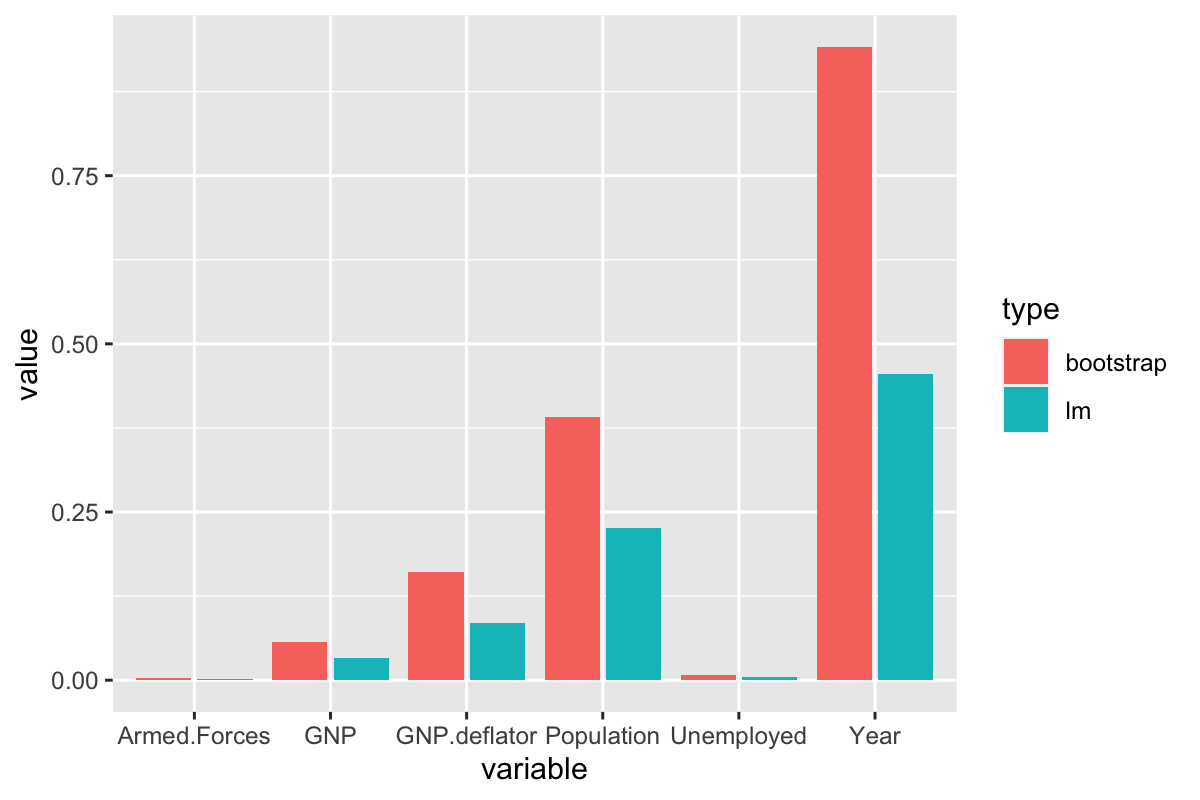

In [86]:
# c) Bootstrap
m <- 100
n <- nrow(longley)
coefficients_boot <- matrix(NA, nrow = m, ncol = ncol(longley))

for (i in 1:m) {
  samples_boot <- sample(1:n, n, replace = TRUE)
  longley_boot <- longley[samples_boot, ]
  model_boot <- lm(Employed ~ ., longley_boot)
  coefficients_boot[i, ] <- model_boot$coefficients
}

bootstrap_se <- apply(coefficients_boot, 2, sd)

data.frame(
  value = c(coefficients$Std..Error, bootstrap_se),
  type = rep(c("lm", "bootstrap"), each = ncol(longley), 1),
  variable = rep(row.names(coefficients), 2)
)[c(-1, -8), ] |>
  ggplot(aes(x = variable, y = value, fill = type)) +
  geom_col(position = "dodge2")
